In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [2]:
tickers = ['TQQQ','TMF']
data = yf.download(tickers, end='2022-12-31')['Adj Close']
data = data[tickers]
for c in data.columns:
    print(c, data[c].first_valid_index())
assets = data.dropna().copy()

print('asset \n', assets)

[*********************100%***********************]  2 of 2 completed
TQQQ 2010-02-11 00:00:00
TMF 2009-04-16 00:00:00
asset 
                  TQQQ        TMF
Date                            
2010-02-11   0.431471   6.695423
2010-02-12   0.433238   6.771189
2010-02-16   0.450019   6.831800
2010-02-17   0.457656   6.613166
2010-02-18   0.466332   6.500600
...               ...        ...
2022-12-06  20.820000   9.590000
2022-12-07  20.570000  10.230000
2022-12-08  21.299999  10.160000
2022-12-09  20.889999   9.380000
2022-12-12  21.650000   9.460000

[3232 rows x 2 columns]


          TQQQ       TMF
TQQQ  1.000000  0.519602
TMF   0.519602  1.000000


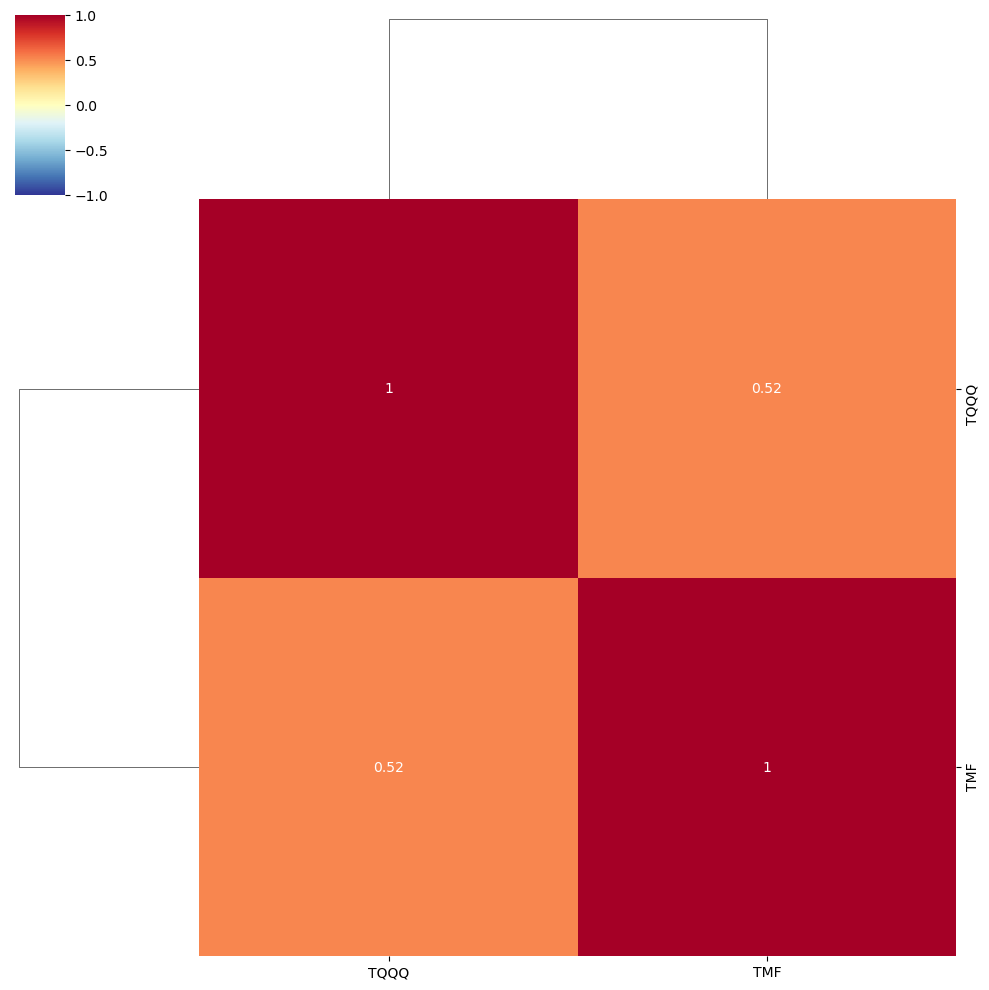

In [3]:
corr = assets.corr()
print(corr)
sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1) #컬러차트 -1 ~ 1 범위로 표시

(array([0, 0, 1]), array([0, 1, 1]))


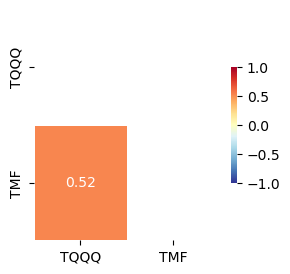

In [5]:
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(3,3))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
print(np.triu_indices_from(mask))

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            annot_kws = {'size':10},
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1)   # 컬러바 범위 -1 ~ 1
plt.show()

rolling corr 
 Date
2010-02-11         NaN
2010-02-12         NaN
2010-02-16         NaN
2010-02-17         NaN
2010-02-18         NaN
                ...   
2022-12-05    0.948190
2022-12-06    0.947674
2022-12-07    0.946674
2022-12-08    0.946068
2022-12-09    0.945256
Name: TQQQ, Length: 3231, dtype: float64
1. corr 
                 corr       TQQQ        TMF
Date                                      
2010-02-11       NaN   0.431471   6.695424
2010-02-12       NaN   0.433238   6.771188
2010-02-16       NaN   0.450019   6.831799
2010-02-17       NaN   0.457656   6.613166
2010-02-18       NaN   0.466332   6.500601
...              ...        ...        ...
2022-12-05  0.948190  22.230000   9.230000
2022-12-06  0.947674  20.820000   9.590000
2022-12-07  0.946674  20.570000  10.230000
2022-12-08  0.946068  21.299999  10.160000
2022-12-09  0.945256  20.889999   9.380000

[3231 rows x 3 columns]


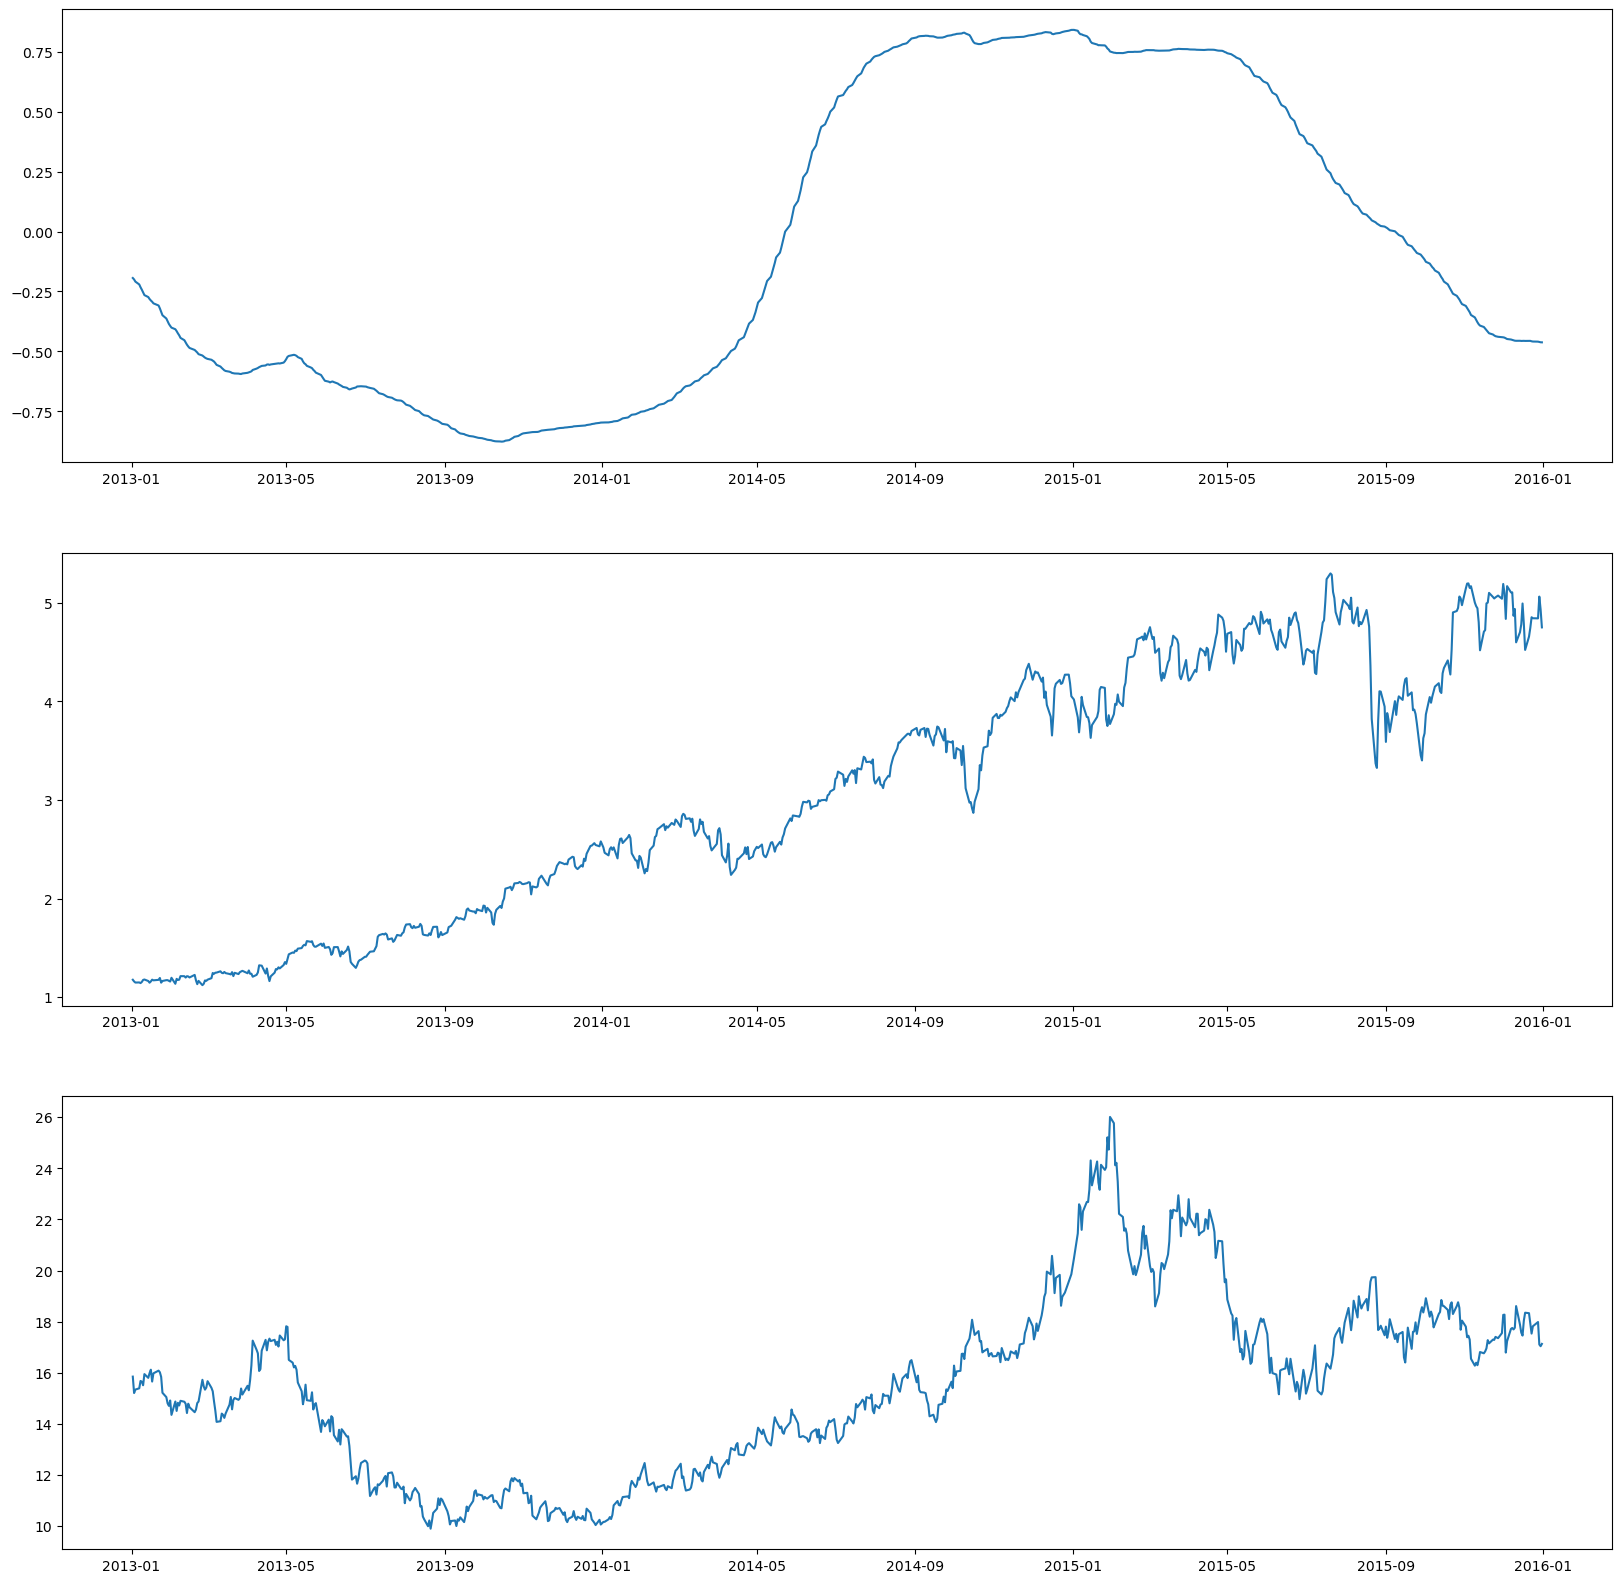

In [137]:
window = 252
rolling_corr = assets.rolling(window).corr()['TQQQ'].loc[:,'TMF']
print('rolling corr \n', rolling_corr)

corr = pd.merge(rolling_corr, assets, on='Date', how='left')
corr.rename(columns={'TQQQ_x':'corr','TQQQ_y':'TQQQ'}, inplace=True)
print('1. corr \n', corr)

#corr = corr / corr.loc[corr.index.max()]
#print('2. corr \n', corr)

corr = corr['2013':'2015']

plt.figure(figsize=(20,20))

plt.subplot(311)
plt.plot(corr.index, corr['corr'])
plt.subplot(312)
plt.plot(corr.index, corr['TQQQ'])
plt.subplot(313)
plt.plot(corr.index, corr['TMF'])
plt.show()




<AxesSubplot:xlabel='TQQQ', ylabel='TMF'>

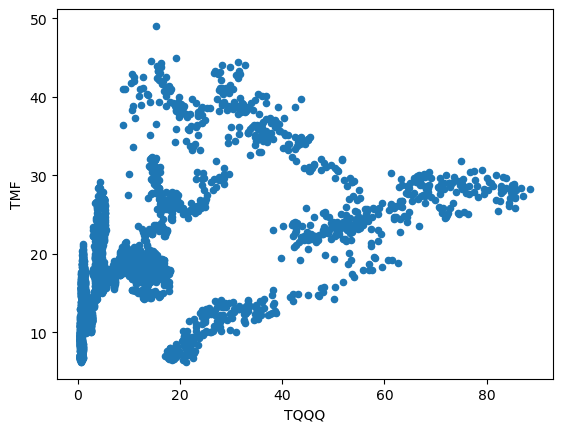

In [64]:
assets.plot(kind='scatter', x='TQQQ', y='TMF')